# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [1]:
 !pip install sweetviz 
#uncomment the above if you need to install the library 
# !pip install auto-sklearn
#uncomment the above if you need to install the library 

In [2]:
 !pip install --upgrade scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
#import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from statsmodels.stats.proportion import proportions_ztest as ztest
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Part One

## EDA

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |                                             | [  0%]   00:00 ->…


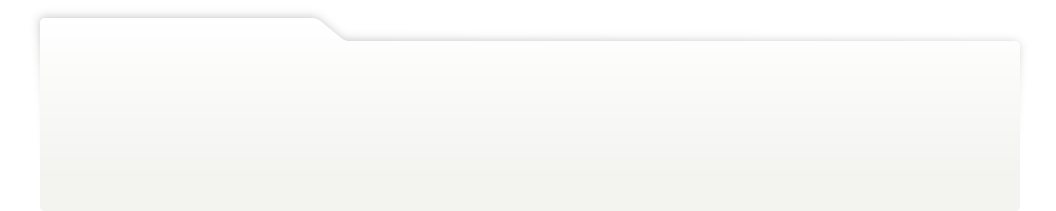
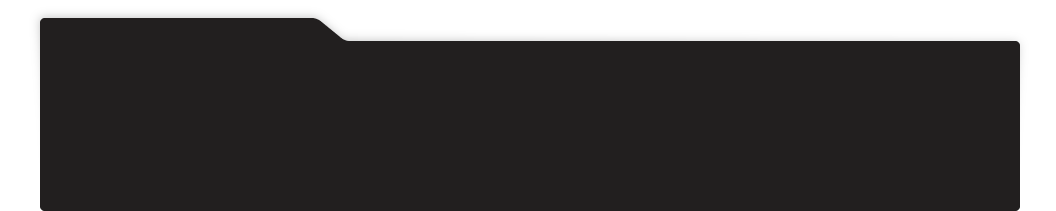
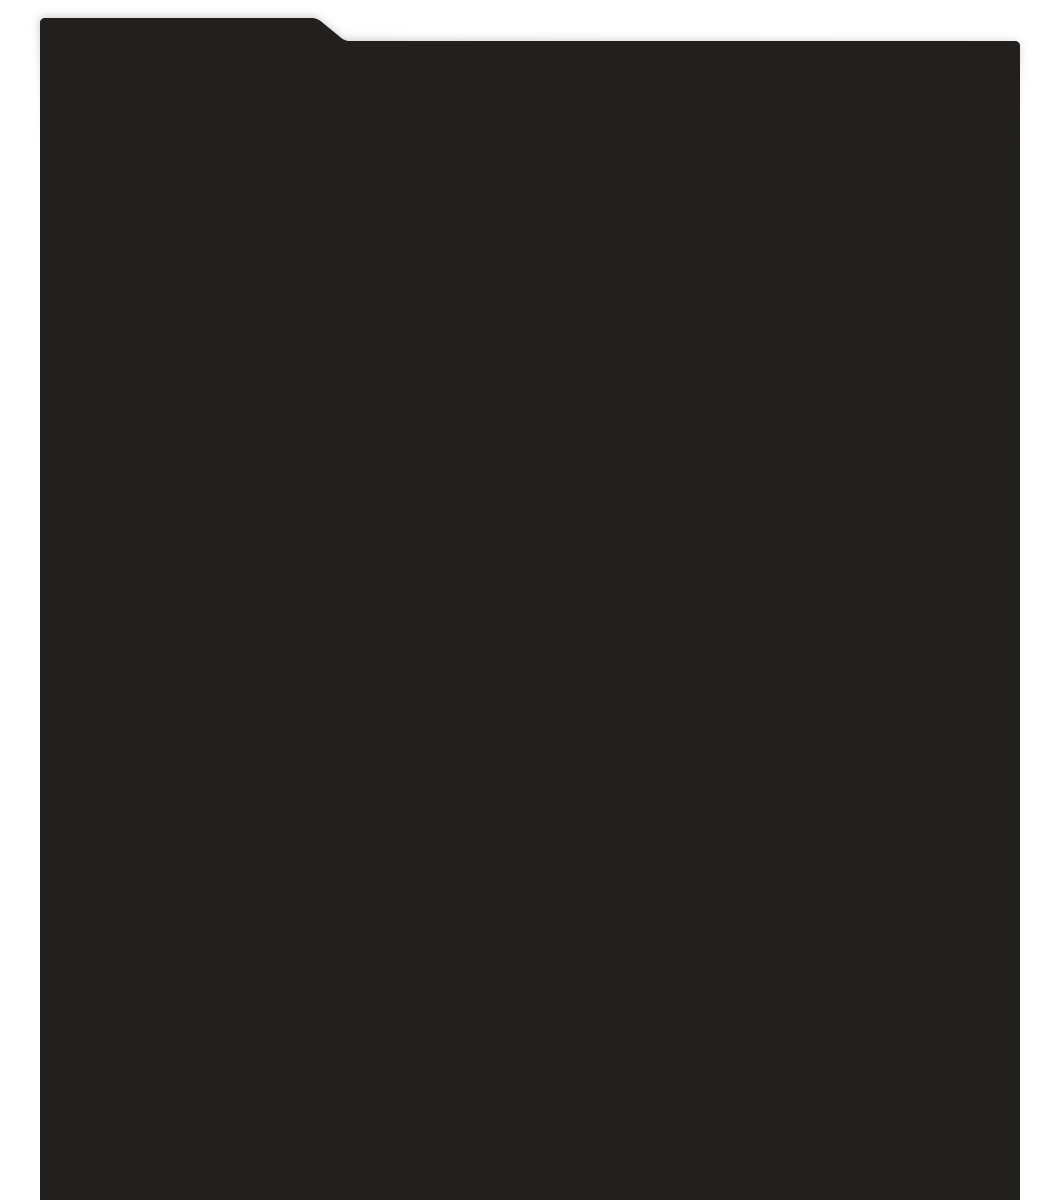
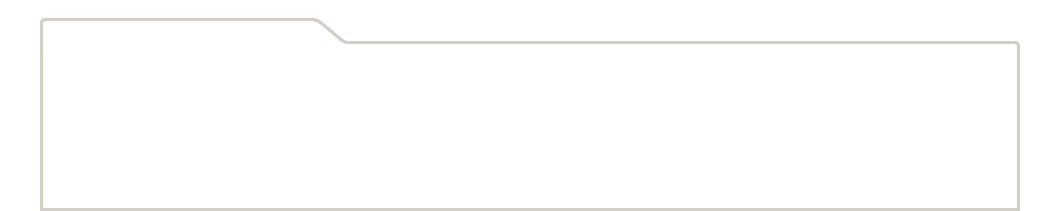
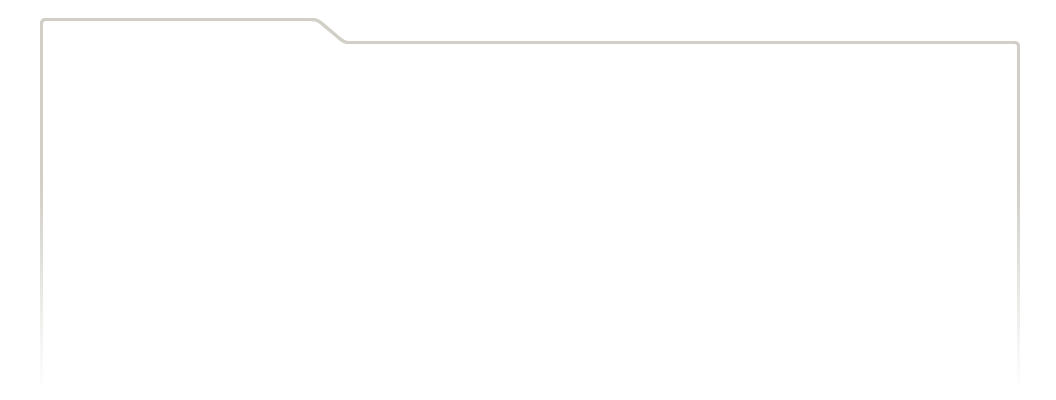
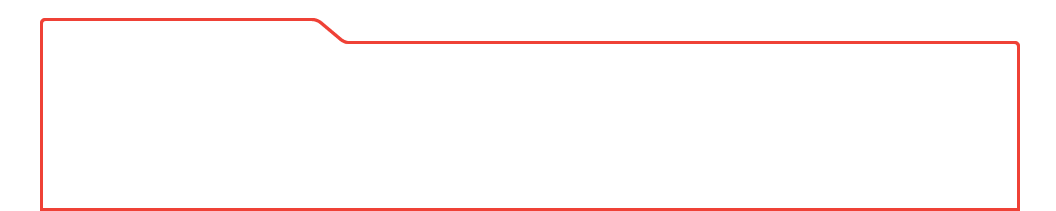
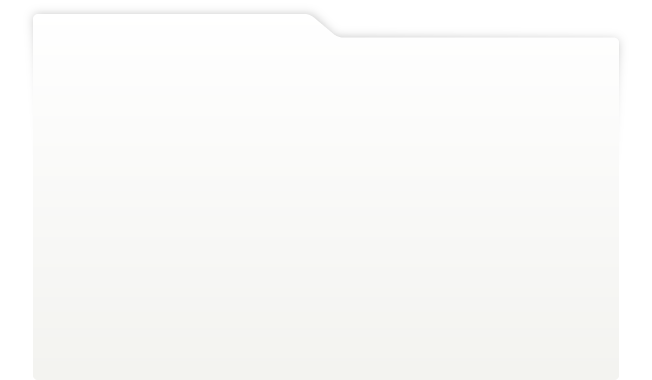
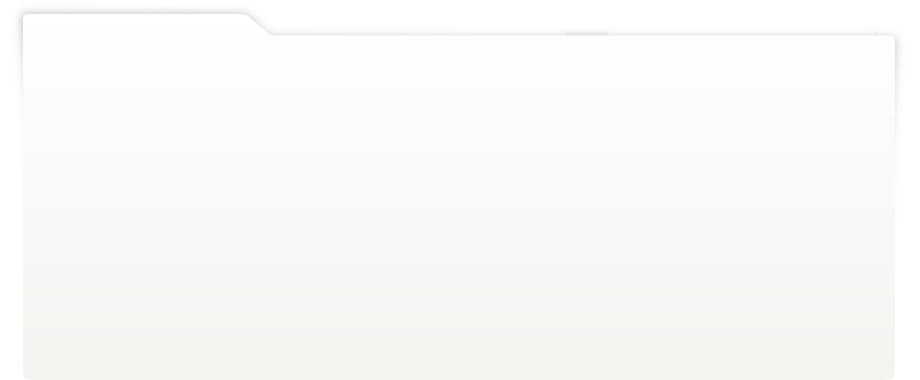
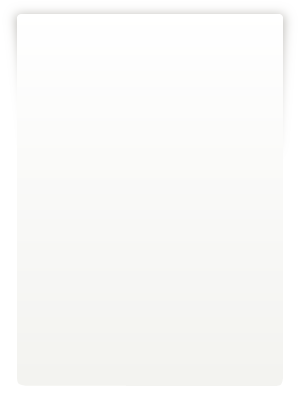
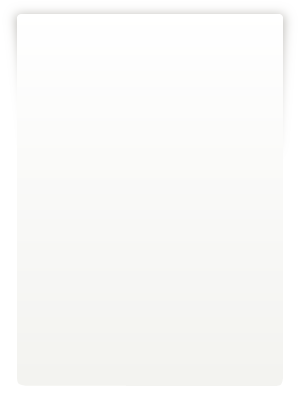
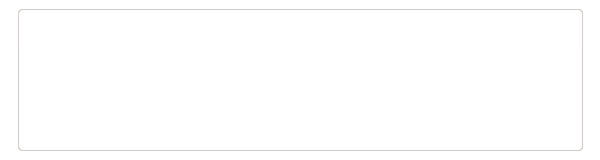
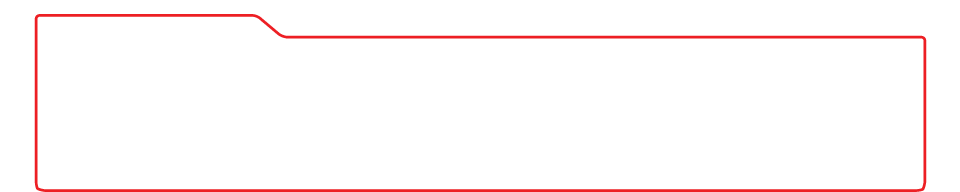
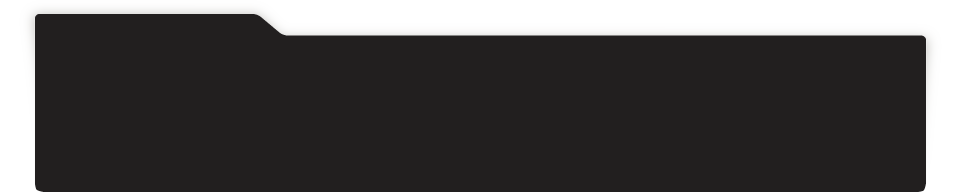
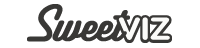
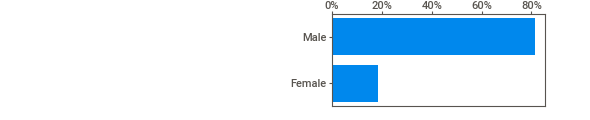
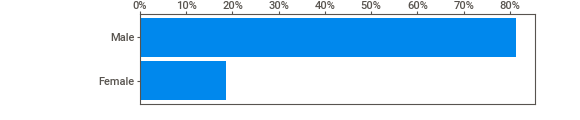
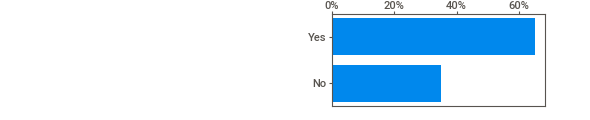
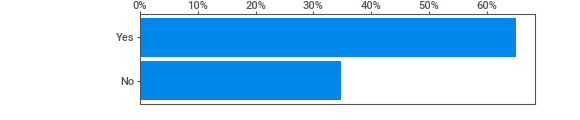
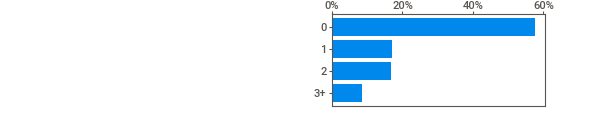
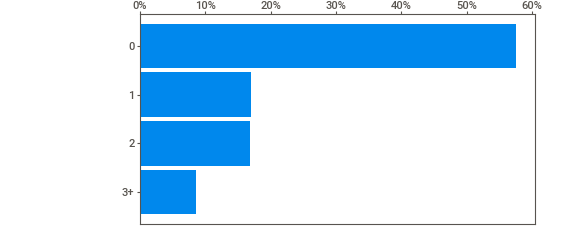
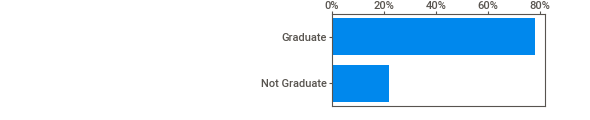
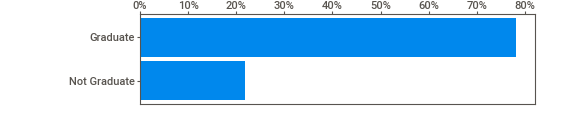
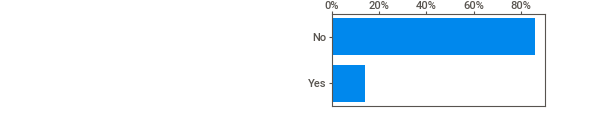
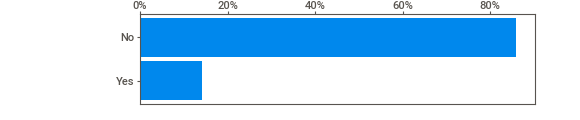
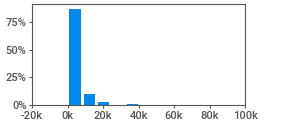
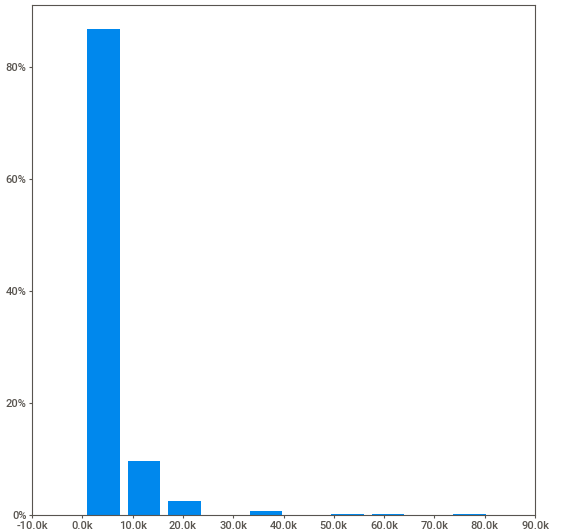
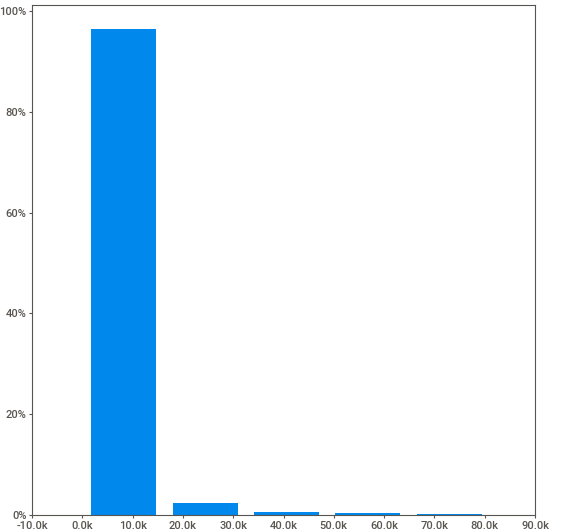
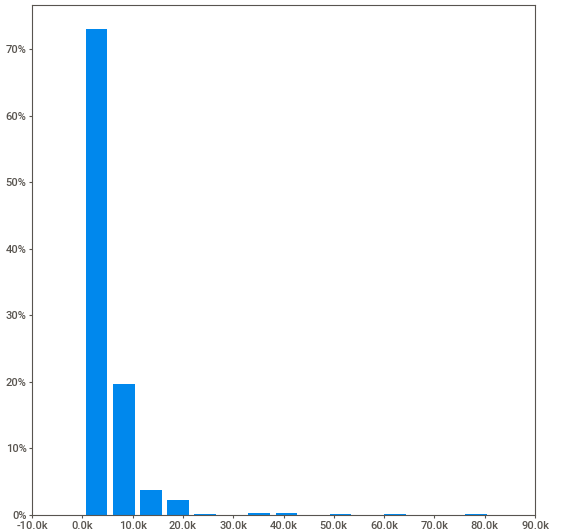
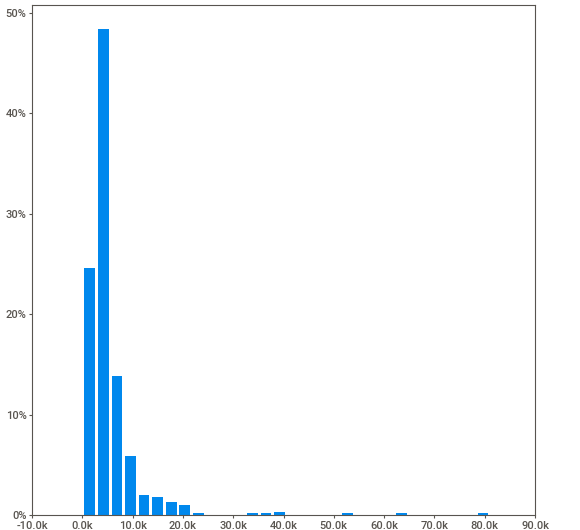
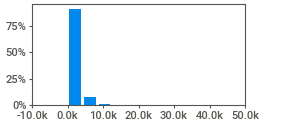
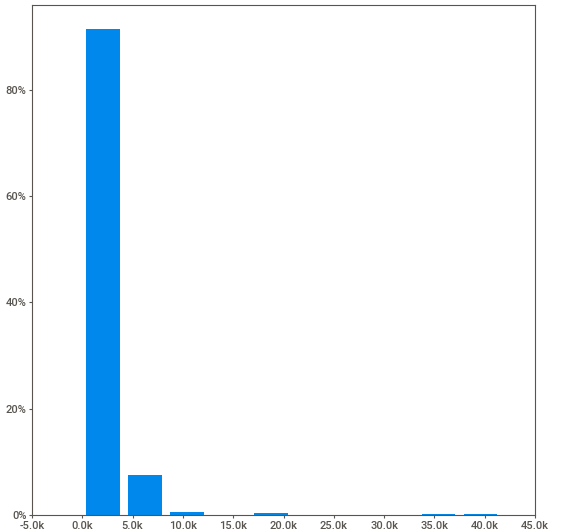
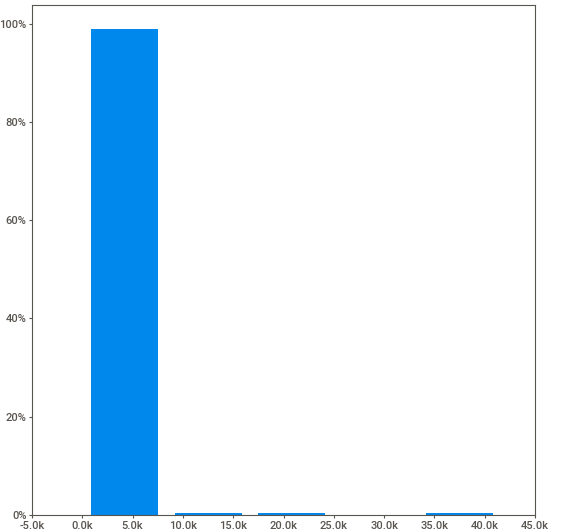
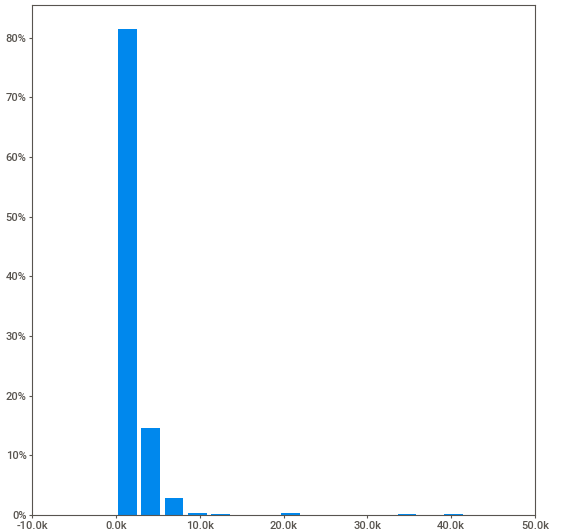
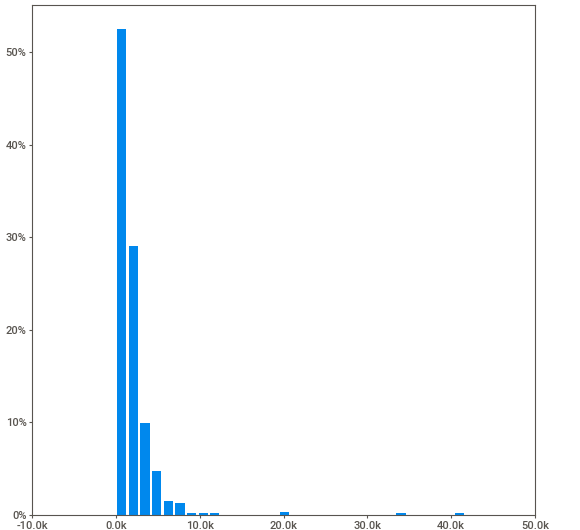
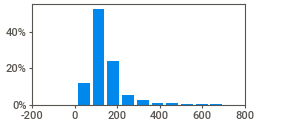
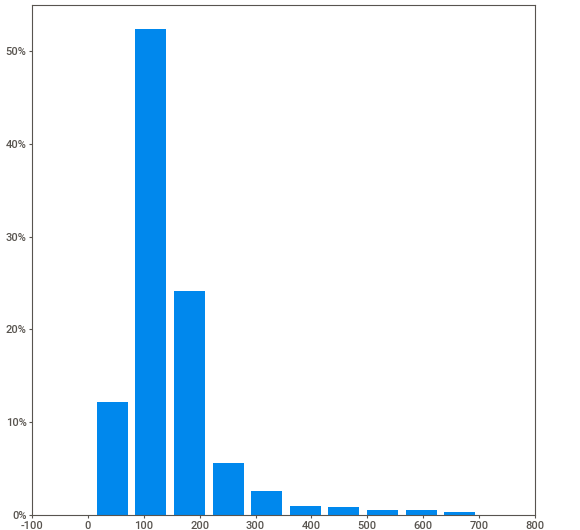
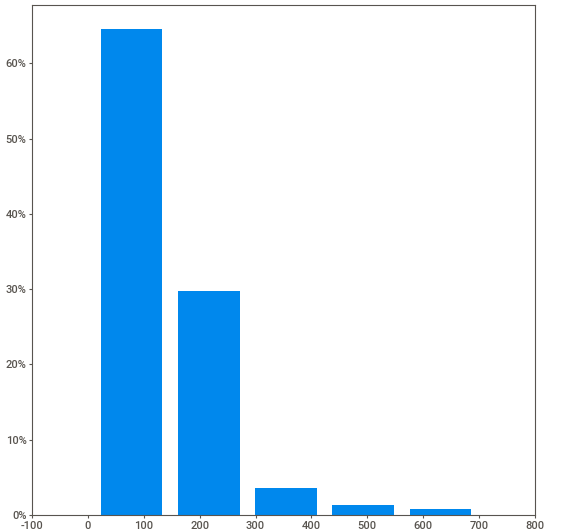
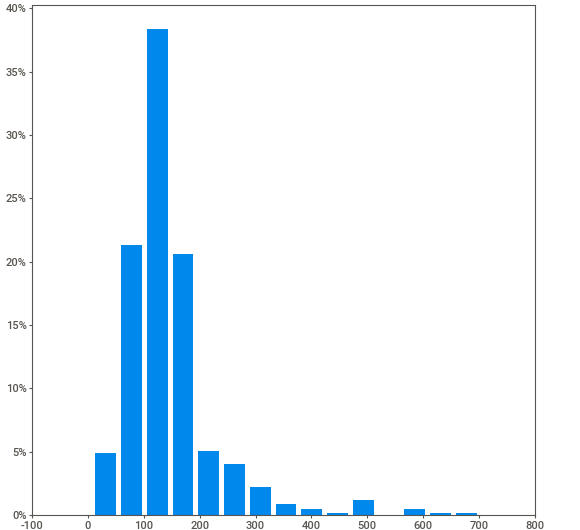
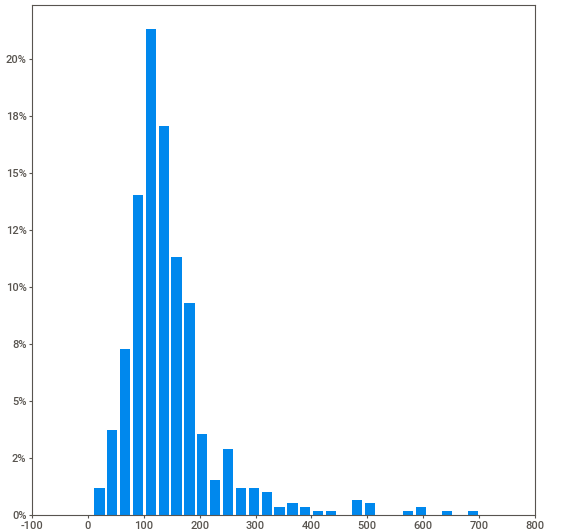
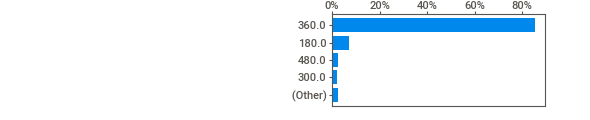
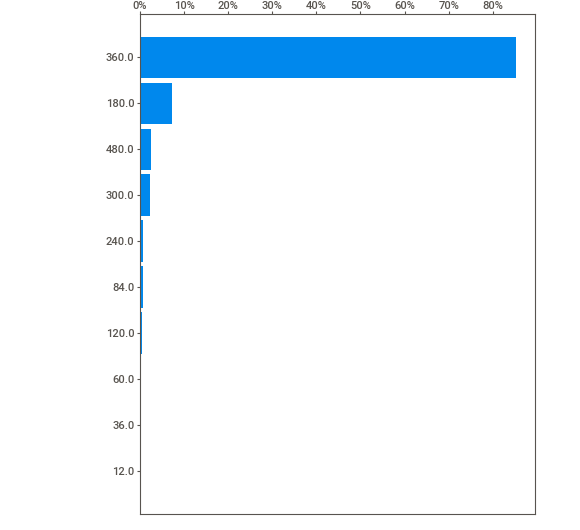
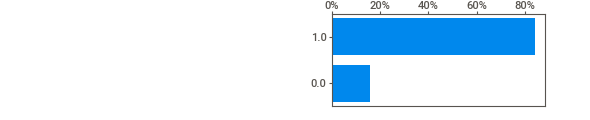
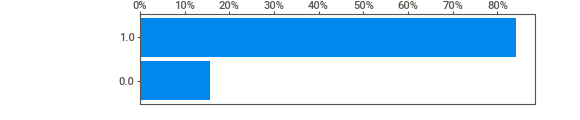
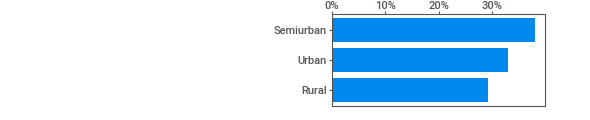
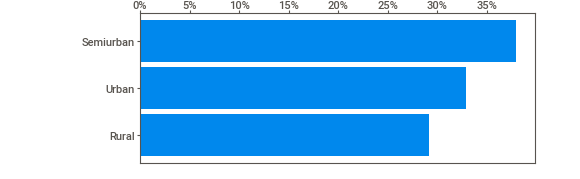
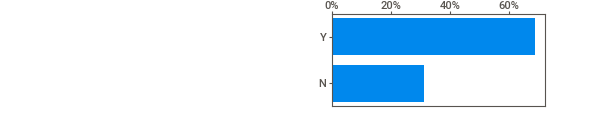
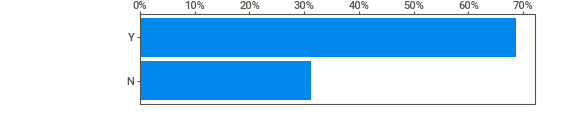
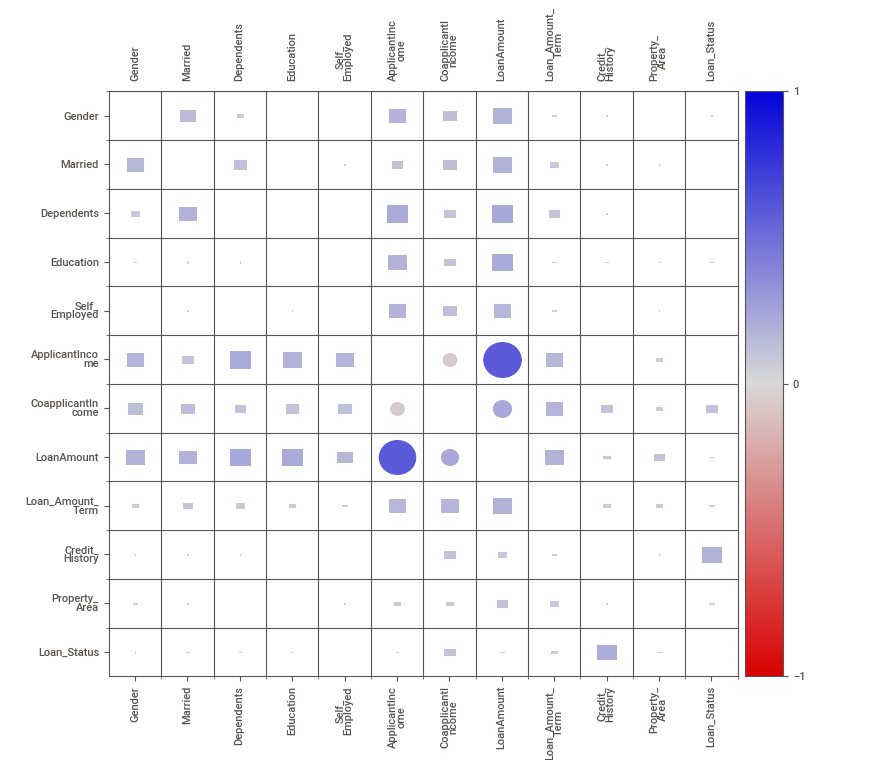
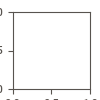

In [8]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

### Your Own EDA 


##### 1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [10]:
print(len(train))
print(len(test))

614
367


In [11]:
# there are 614 data record for train set, and 367 for test set. 
# there are some data type within the dataset, such as : object, int64 and float64

##### 2 What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

In [12]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
# yes, we got some missing values here, but the good news is, there is'nt data duplication 

#### 3. How do the the loan statuses compare? i.e. what is the distrubition of each? 

In [15]:
num_of_yes = len(train.Loan_Status[train.Loan_Status == "Y"])
num_of_no = len(train.Loan_Status[train.Loan_Status == "N"])
Y_comparition = round(num_of_yes/(num_of_yes+num_of_no),2)
N_comparition = round(num_of_no/(num_of_yes+num_of_no),2)
odd_comparison = f"{Y_comparition}:{N_comparition}"
print(num_of_yes)
print(num_of_no)
print("this is the comparison between Y and N in Loan_Status : {}".format(odd_comparison))

422
192
this is the comparison between Y and N in Loan_Status : 0.69:0.31


In [16]:
new_data = train[['Loan_Status', 'Gender']]

,Loan_Status,Gender
0,Y,Male
1,N,Male


In [17]:
train.Gender.shape

(614,)

In [22]:
Male_Y = train.loc[(train.Gender == 'Male')&(train.Loan_Status == 'Y')].Gender.count()
Male_N = train.loc[(train.Gender == 'Male')&(train.Loan_Status == 'N')].Gender.count()
Female_Y = train.loc[(train.Gender == 'Female')&(train.Loan_Status == 'Y')].Gender.count()
Female_N = train.loc[(train.Gender == 'Female')&(train.Loan_Status == 'N')].Gender.count()

In [23]:
print(Male_Y)
print(Male_N)
print(Female_Y)
print(Female_N)

339
150
75
37


In [48]:
label_name = [Male_Y, Female_Y, Male_N, Female_N]

In [77]:
train.query("Gender == 'Male'").Gender

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
607    Male
608    Male
610    Male
611    Male
612    Male
Name: Gender, Length: 489, dtype: object

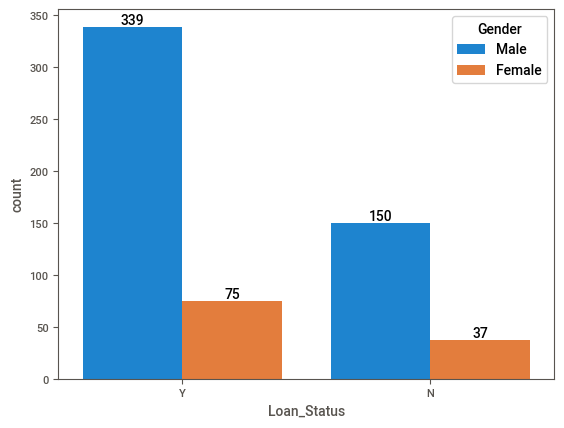

In [83]:
fig, ax = plt.subplots()
ax = sns.countplot(data = train, x = 'Loan_Status', hue = train.Gender)
#ax.bar_label(container=ax.containers[0], labels=label_name)
#plt.bar_label(ax.containers[[0:2]], labels = label_name)
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

ax.get_figure().savefig("the number of loan status along with gender.png")

In [ ]:
# from the chart, we know that, the Y values is 2X higher than the N values.
# for the sake of training model sufficiency, we need to ballancing both of these values

#### 4.How do women and men compare when it comes to defaulting on loans in the historical dataset?

In [84]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [85]:
num_4 = train.query("Loan_Status == 'N'")
num_4.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [86]:
num_4.groupby("Gender")["Loan_Status"].count()

Gender
Female     37
Male      150
Name: Loan_Status, dtype: int64

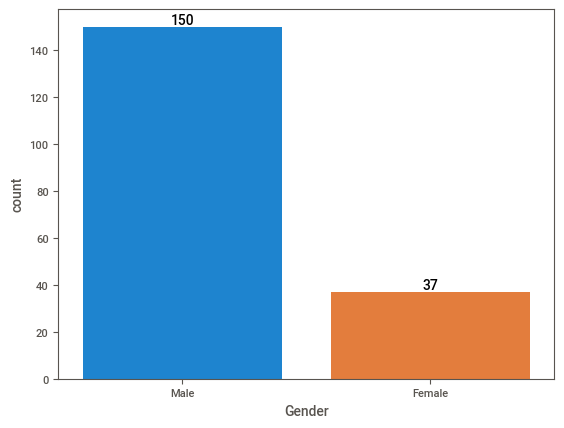

In [87]:
label_gender = num_4.Gender.value_counts().values
fig, ax = plt.subplots()
ax = sns.countplot(data = num_4,x = "Gender")
ax.bar_label(container = ax.containers[0], labels = label_gender)
figure = ax.get_figure()
figure.savefig("the comparison of applicant gender.png");

In [88]:
# based on historical dataset, male is more likely to defaulting on loan than female

#### 5. How many of the loan applicants have dependents based on the historical dataset?

In [89]:
df[df.Dependents != '0'].shape[0]

436

In [90]:
# the number of applicant that have a dependents is 436

#### 6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

In [91]:
df.groupby("Self_Employed")["ApplicantIncome"].mean().round(2)

Self_Employed
No     4892.03
Yes    6912.58
Name: ApplicantIncome, dtype: float64

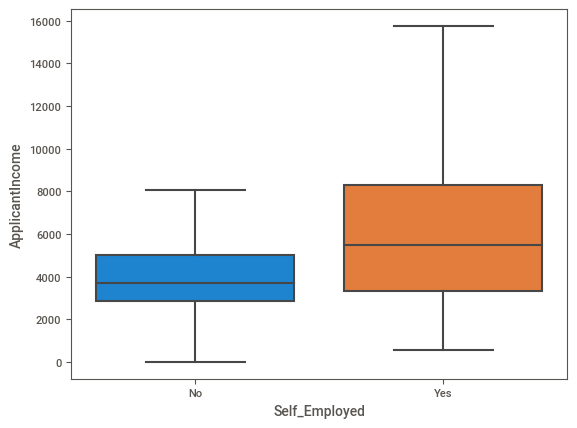

In [92]:
fig, ax = plt.subplots()
ax = sns.boxplot(x = df.Self_Employed, y = df.ApplicantIncome, showfliers=False)
ax.get_figure().savefig("the comparison of self_employed.png")

In [93]:
# from the chart we know that, the average income for applicants who are employed, is higher that the applicants who aren't employed

#### 7. Are applicants with a credit history more likely to default than those who do not have one?

In [94]:
task7_cond = train[train.Loan_Status == "N"][["Credit_History"]]
task7_cond.value_counts()

Credit_History
1.0               97
0.0               82
dtype: int64

In [95]:
task7_cond

,Credit_History
1,1.0
7,0.0
9,1.0
13,1.0
17,0.0
...,...
596,1.0
597,0.0
600,NaN
605,1.0


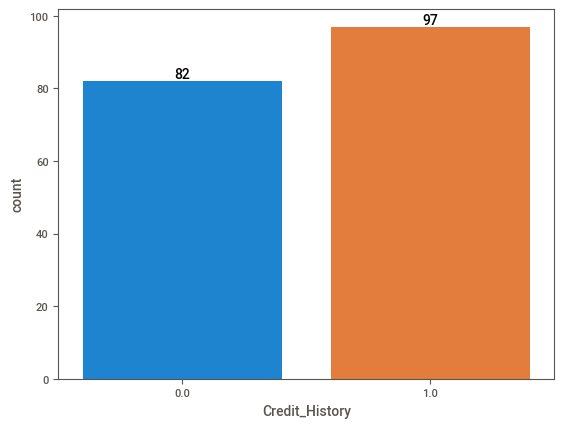

In [96]:
fig, ax = plt.subplots()
ax = sns.countplot(data = task7_cond, x = task7_cond.Credit_History)
ax.bar_label(container = ax.containers[0], label = task7_cond.value_counts().index.values)
ax.get_figure().savefig("the comparison of credit history.png")
plt.show()

In [97]:
stats, p_value = ztest(count = task7_cond.Credit_History.astype('Int64').value_counts().values ,
                   nobs = train.Credit_History.astype('Int64').value_counts().values)
print("{0:0.3f}".format(p_value))

0.000


In [98]:
# form the chart, we will notice that the participants who have a credit history are more likely to defaulting the loans, than the participants who have'nt credit history
# since the p-value that we got from ztest is lower than 0.05, we can assume that the likelihood for those who have historical credit, is higher than the participants who doesn't

#### 8.Is there a correlation between the applicant's income and the loan amount they applied for?

In [99]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


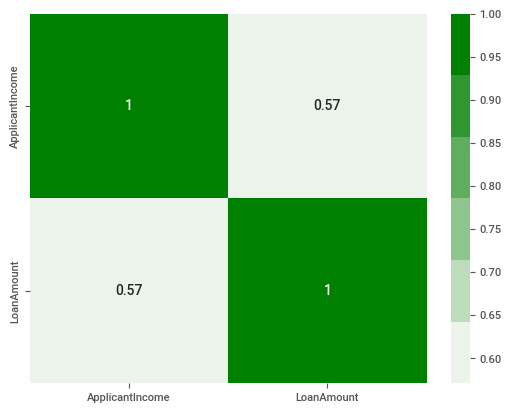

In [100]:
num_8 = train[['ApplicantIncome','LoanAmount']]
fig, ax = plt.subplots()
color = sns.light_palette("green", as_cmap=False)
sns.heatmap(num_8.corr(), cmap = color, annot = True);

In [101]:
num_8.corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.570909
LoanAmount,0.570909,1.000000


In [102]:
# since corr values that we got is 0.57, we can assume that the correlation between Applicant income and loan amount is not significant

## Your anwers:

1. there are 614 data record for train set, and 367 for test set, consist object, int64 and float64 data type

2. yes, we got some missing values here and there isn't data duplication 

3. from the chart, we know that, the Y values is 2X higher than the N values. 

4. based on historical dataset, male is more likely to defaulting on loan than female

5. the number of applicant that have a dependents is 436

6. the average income for applicants who are employed, is higher that the applicants who aren't employed

7. the participants who have a credit history are more likely to defaulting the loans

8. the correlation between Applicant income and loan amount is not significant

9.

10.

# Part Two

## Auto ML wth autosklearn


## Bespoke ML sklearn

### Data Preparation

In [103]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [105]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

#### checking the outliers

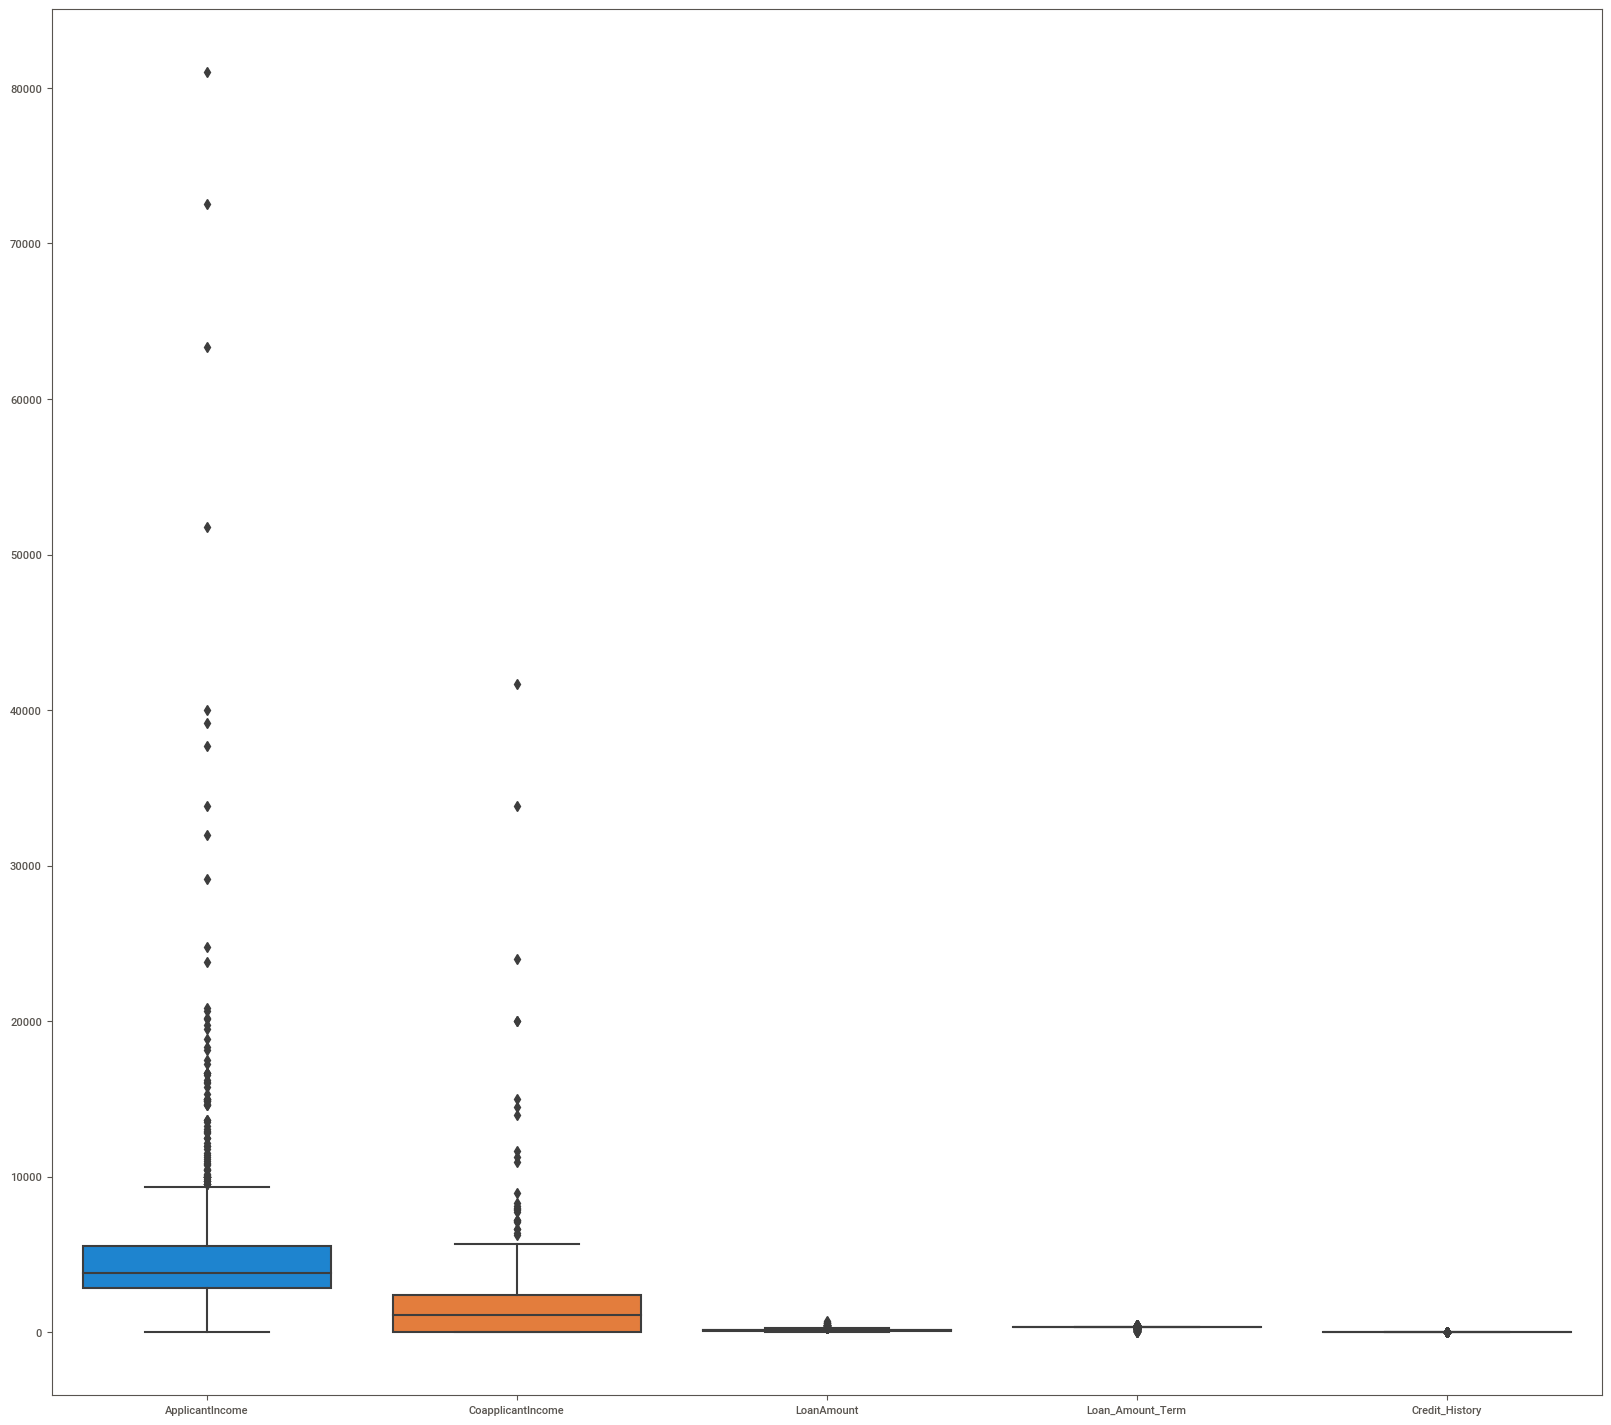

In [106]:
plt.figure(figsize=(20,18))
sns.boxplot(data=df)
plt.show()

In [107]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [108]:
# through the boxplot and the data description, we can notice that, there are an outliers in ApplicantIncome 
# and CoapplicantIncome, therefore this problem should be takled

### Check Point 1

In [109]:
dataset = df.copy()

In [110]:
min_treshold_applicantincome, max_treshold_applicantincome = dataset.ApplicantIncome.quantile([0.1, 0.9])
print(min_treshold_applicantincome)
print(max_treshold_applicantincome)

2221.0
8750.0


In [111]:
min_treshold_coapplicantincome, max_treshold_coapplicantincome = dataset.CoapplicantIncome.quantile([0.05, 0.95])
print(min_treshold_coapplicantincome)
print(max_treshold_coapplicantincome)

0.0
4700.0


In [112]:
min_treshold_Loan_Amount_Term, max_treshold_Loan_Amount_Term = dataset.Loan_Amount_Term.quantile([0.05, 0.95])
print(min_treshold_Loan_Amount_Term)
print(max_treshold_Loan_Amount_Term)

180.0
360.0


In [113]:
min_treshold_LoanAmount, max_treshold_LoanAmount = dataset.LoanAmount.quantile([0.05, 0.95])
print(min_treshold_LoanAmount)
print(max_treshold_LoanAmount)

59.650000000000006
276.39999999999964


In [114]:
dataset = dataset[(dataset.ApplicantIncome >= min_treshold_applicantincome) & 
                      (dataset.ApplicantIncome <= max_treshold_applicantincome) &
                      (dataset.CoapplicantIncome >= min_treshold_coapplicantincome) &
                      (dataset.CoapplicantIncome <= max_treshold_coapplicantincome) &
                      (dataset.Loan_Amount_Term >= min_treshold_Loan_Amount_Term) &
                      (dataset.Loan_Amount_Term <= max_treshold_Loan_Amount_Term) &
                      (dataset.LoanAmount >= min_treshold_LoanAmount) &
                      (dataset.LoanAmount <= max_treshold_LoanAmount) 
                     ]

In [115]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,648.000000,648.000000,648.000000,648.000000,596.000000
mean,4178.265432,1231.995247,132.885802,347.577160,0.842282
std,1481.734143,1326.992094,40.382016,43.382775,0.364783
min,2221.000000,0.000000,60.000000,180.000000,0.000000
25%,3075.750000,0.000000,106.000000,360.000000,1.000000
50%,3795.500000,1012.500000,128.000000,360.000000,1.000000
75%,4962.000000,2171.750000,154.250000,360.000000,1.000000
max,8703.000000,4700.000000,275.000000,360.000000,1.000000


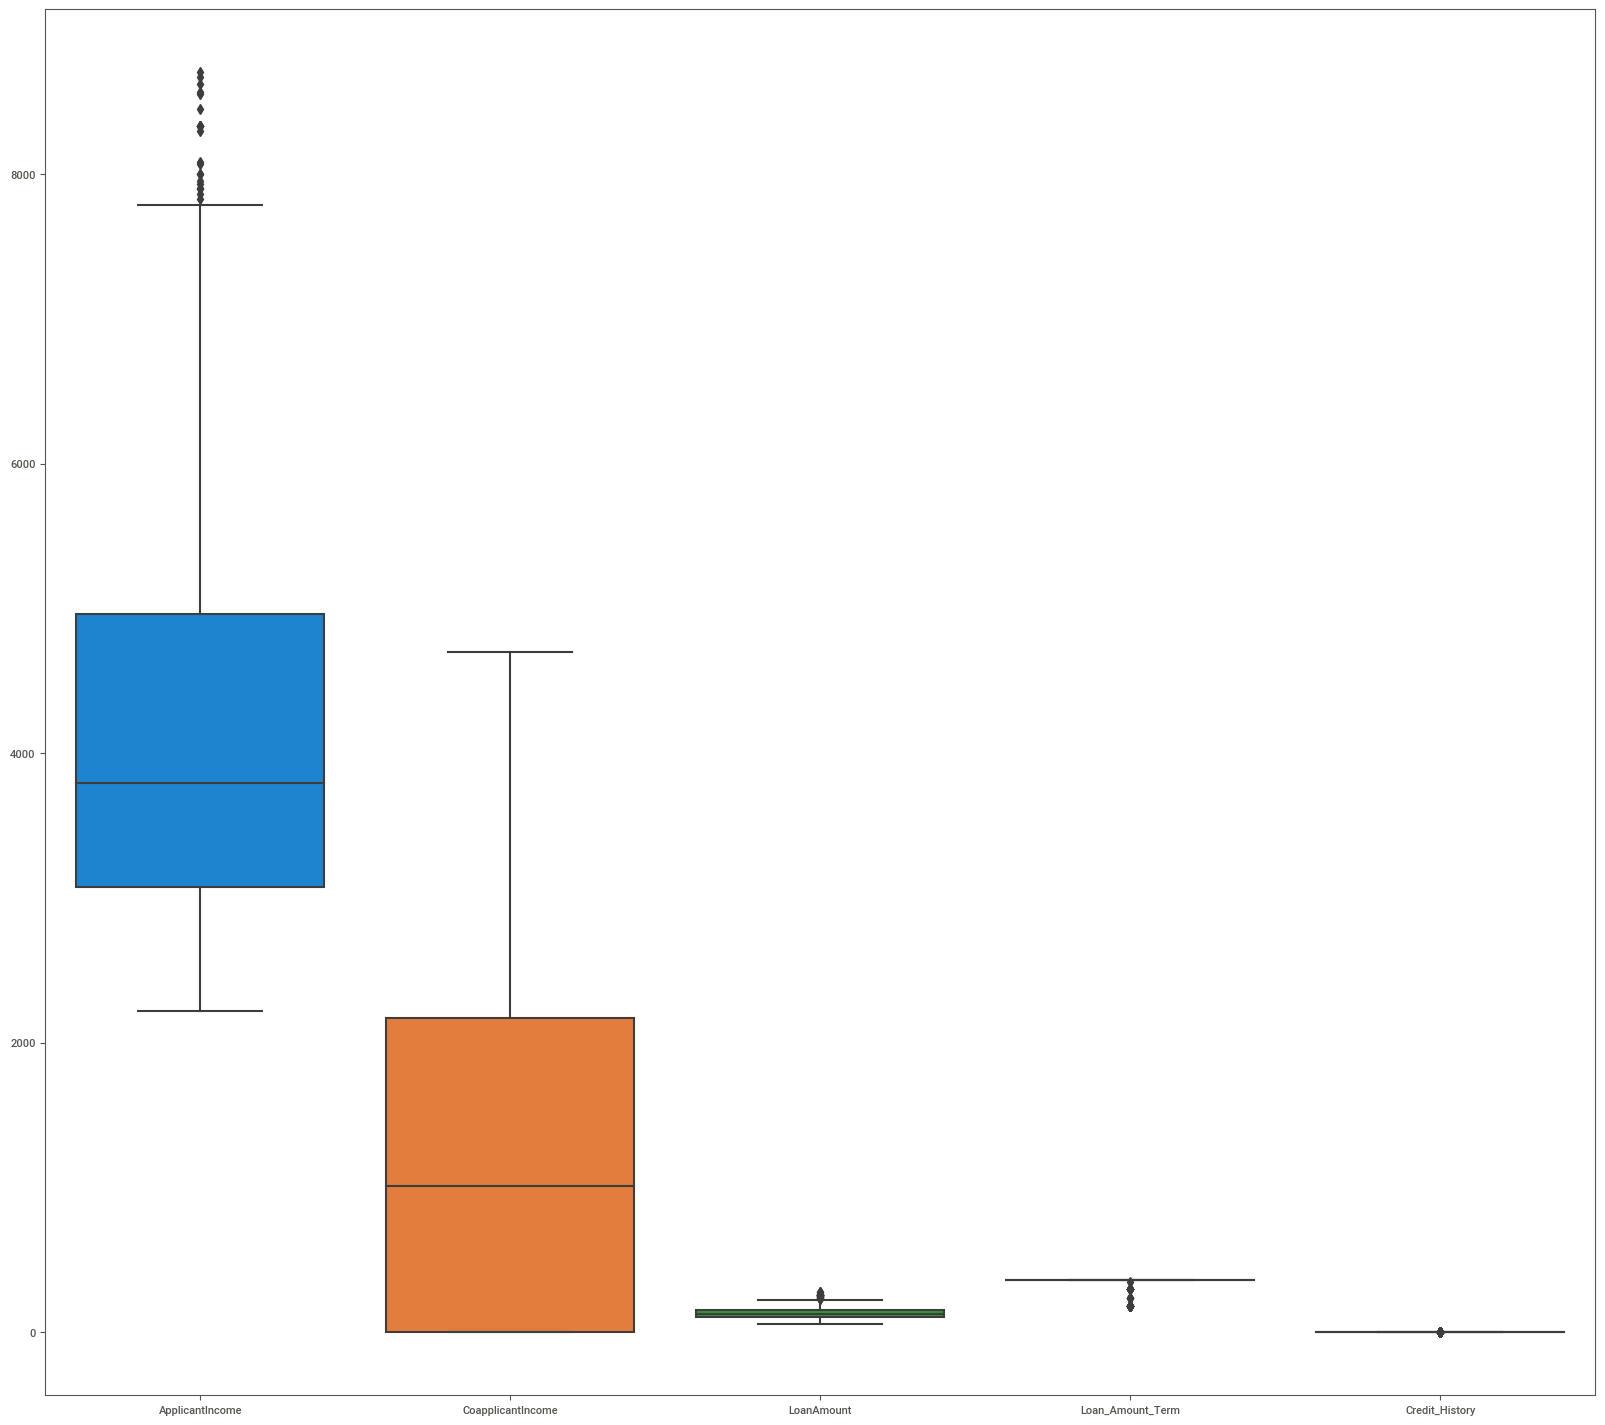

In [116]:
plt.figure(figsize=(20,18))
sns.boxplot(data=dataset)
plt.show()

In [117]:
dataset.shape

(648, 13)

In [118]:
df.shape

(981, 13)

In [119]:
# building a reusable function, so we can easily preprocessing data for the next project 
# this fucntion is aimed to find a proper way to transform and filling missing value according to the data type, the number of unique value and missing value existance
def missing_insight(input_data):
    data_parent = input_data.copy()
    int_columns = data_parent.select_dtypes(include='int64').columns[0]
    data_parent[[int_columns]] = data_parent[[int_columns]].astype('float64')
    #data_parent.info()
    null_data = pd.DataFrame(data = data_parent.isna().sum().values, index = df.isna().sum().index, columns = ['null'])
    #null_data.info()
    null_data = null_data.iloc[1:-1,:]
    null_data["dtype"] = data_parent[list(null_data.index)].dtypes.values
    null_data["unique"] = [len(list(df[i].value_counts().index)) for i in null_data.index]
    null_data = null_data.reset_index(inplace=False)
    null_data['columns_name'] = null_data['index']
    null_data = null_data.drop(columns = ['index'])
    null_data.insert(0, 'columns_name', null_data.pop('columns_name'))
    labelencoder_treatment = list(null_data.loc[(null_data.unique == 2)].columns_name)
    dummies_treatment = list(null_data.loc[(null_data.dtype == "object")&(null_data.unique > 2)&(null_data.unique <= 10)].columns_name)
    numeric_treatment = list(null_data.loc[(null_data.dtype == "float64")&(null_data.unique > 10)].columns_name)
    fill_with_mode = list(null_data.loc[(null_data.null != 0)&(null_data.unique >= 2)&(null_data.unique <= 10)].columns_name)
    fill_with_mean = list(null_data.loc[(null_data.dtype != "object64")&(null_data.null != 0)&(null_data.unique > 10)].columns_name)
    print("fill missing_values here, using mode : fill_with_mode = {}".format(fill_with_mode))
    print("fill missing_values here, using mean : fill_with_mean = {}".format(fill_with_mean))
    print("transform this columns using Label Encoder : labelencoder_treatment = {}".format(labelencoder_treatment))
    print("transform this columns using Dummies : dummies_treatment = {}".format(dummies_treatment))
    print("transform this columns using numeric treatment : numeric_treatment = {}".format(numeric_treatment))
    null_data
    return  null_data

In [120]:
insight_of_missing_values = missing_insight(df)
insight_of_missing_values

fill missing_values here, using mode : fill_with_mode = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
fill missing_values here, using mean : fill_with_mean = ['LoanAmount', 'Loan_Amount_Term']
transform this columns using Label Encoder : labelencoder_treatment = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
transform this columns using Dummies : dummies_treatment = ['Dependents', 'Property_Area']
transform this columns using numeric treatment : numeric_treatment = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


,columns_name,null,dtype,unique
0,Gender,24,object,2
1,Married,3,object,2
2,Dependents,25,object,4
3,Education,0,object,2
4,Self_Employed,55,object,2
5,ApplicantIncome,0,float64,752
6,CoapplicantIncome,0,float64,437
7,LoanAmount,27,float64,232
8,Loan_Amount_Term,20,float64,12
9,Credit_History,79,float64,2


In [121]:
fill_with_mode = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
fill_with_mean = ['LoanAmount', 'Loan_Amount_Term']
labelencoder_treatment = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
dummies_treatment = ['Dependents', 'Property_Area']
numeric_treatment = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

### Check Point 2 

#### creating a check point, so we doesn't need to restart and run all cell again, if we againts any kind of error on the next step

In [122]:
df_new = dataset.copy()

#### handling missing value, with a proper method based on the data type

In [123]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_new.loc[:,fill_with_mode] = imputer.fit_transform(df_new.loc[:,fill_with_mode]) 

In [124]:
imputer2 = SimpleImputer(missing_values = np.nan, strategy = "median")
df_new.loc[:,fill_with_mean] = imputer2.fit_transform(df_new.loc[:,fill_with_mean])

#### transform the data using label encoder and dummies

In [125]:
dumm_df = df_new.copy()
dumm_df = pd.get_dummies(data = dumm_df, columns = dummies_treatment, drop_first=True)

In [126]:
dumm_df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,0
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,0,0,1
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,0,0,1
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,0,0,0,1
5,LP001011,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,0,1


In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_data = dumm_df.copy()
le_data[labelencoder_treatment]  = le_data[labelencoder_treatment].apply(le.fit_transform)

In [128]:
le_data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1,N,1,0,0,0,0
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1,Y,0,0,0,0,1
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1,Y,0,0,0,0,1
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1,Y,0,0,0,0,1
5,LP001011,1,1,0,1,5417,4196.0,267.0,360.0,1,Y,0,1,0,0,1


In [129]:
le_data = le_data.drop(columns=['Loan_ID']) # we drop this columns, since there isn't any significant information we can leverage from this feature

In [130]:
le_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1,N,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1,Y,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1,Y,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1,Y,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1,Y,0,1,0,0,1


### Check Point 3

In [131]:
new_df = le_data.copy()

In [132]:
new_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
1,1,1,0,0,4583,1508.0,128.0,360.0,1,N,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1,Y,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1,Y,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1,Y,0,0,0,0,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1,Y,0,1,0,0,1


In [133]:
cols = list(new_df.columns.values) 
cols.pop(cols.index('Loan_Status')) 
new_df = new_df[cols+['Loan_Status']] 
# the goal of this step is to repositioning the Loan_Status column, in to a better position, whish is the most right side of table

In [134]:
new_df.tail()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
361,1,1,0,0,2269,2167.0,99.0,360.0,1,1,0,0,1,0,NaN
362,1,1,1,1,4009,1777.0,113.0,360.0,1,0,0,1,0,1,NaN
363,1,1,0,0,4158,709.0,115.0,360.0,1,0,0,0,0,1,NaN
364,1,0,0,0,3250,1993.0,126.0,360.0,1,0,0,0,1,0,NaN
365,1,1,0,0,5000,2393.0,158.0,360.0,1,0,0,0,0,0,NaN


In [135]:
new_df.shape

(648, 15)

In [136]:
new_train = new_df[new_df.Loan_Status.notnull()]
new_test = new_df[new_df.Loan_Status.isnull()]

In [137]:
new_train.tail()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
608,1,1,0,0,3232,1950.0,108.0,360.0,1,0,0,0,0,0,Y
609,0,0,0,0,2900,0.0,71.0,360.0,1,0,0,0,0,0,Y
611,1,1,0,0,8072,240.0,253.0,360.0,1,1,0,0,0,1,Y
612,1,1,0,0,7583,0.0,187.0,360.0,1,0,1,0,0,1,Y
613,0,0,0,1,4583,0.0,133.0,360.0,0,0,0,0,1,0,N


In [138]:
new_train.isna().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
dtype: int64

In [139]:
new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)
#rename the target/label data, into a 1 and 0, since our current project is binary prediction (Y or N)

In [140]:
new_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1,1,0,0,0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1,0,0,0,0,1,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1,0,0,0,0,1,1
4,1,0,0,0,6000,0.0,141.0,360.0,1,0,0,0,0,1,1
5,1,1,0,1,5417,4196.0,267.0,360.0,1,0,1,0,0,1,1


In [141]:
new_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,1,1,0,0,5720,0.0,110.0,360.0,1,0,0,0,0,1,NaN
1,1,1,0,0,3076,1500.0,126.0,360.0,1,1,0,0,0,1,NaN
2,1,1,0,0,5000,1800.0,208.0,360.0,1,0,1,0,0,1,NaN
3,1,1,0,0,2340,2546.0,100.0,360.0,1,0,1,0,0,1,NaN
4,1,0,1,0,3276,0.0,78.0,360.0,1,0,0,0,0,1,NaN


In [142]:
new_test = new_test.drop(columns=['Loan_Status'])

In [143]:
new_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,5720,0.0,110.0,360.0,1,0,0,0,0,1
1,1,1,0,0,3076,1500.0,126.0,360.0,1,1,0,0,0,1
2,1,1,0,0,5000,1800.0,208.0,360.0,1,0,1,0,0,1
3,1,1,0,0,2340,2546.0,100.0,360.0,1,0,1,0,0,1
4,1,0,1,0,3276,0.0,78.0,360.0,1,0,0,0,0,1


In [144]:
X = new_train.iloc[:, :-1].values
y = new_train.iloc[:,-1].values

In [145]:
print(X)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [146]:
print(y)

[0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0]


In [147]:
print(X.shape)
print(y.shape)

(385, 14)
(385,)


In [148]:
X[0]

array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.583e+03, 1.508e+03,
       1.280e+02, 3.600e+02, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00])

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# splitting train data into a train set and test set

In [150]:
se = StandardScaler()
X_train[:,4:7] = se.fit_transform(X_train[:,4:7])
X_test[:,4:7] = se.fit_transform(X_test[:,4:7])

In [151]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
# training the logistic regression model

LogisticRegression(random_state=42)

In [152]:
predict_clf = lr.predict(X_test)

In [153]:
print('Model Accuracy:', accuracy_score(predict_clf, y_test))
# predicting the Loan_Status in y_test data
# the accuracy of our model is 87,01%

Model Accuracy: 0.8701298701298701


In [154]:
print(confusion_matrix(predict_clf, y_test))
# with using this matrix, we will know, how many the correct and incorrect prediction our model's done

[[14  1]
 [ 9 53]]


In [155]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.19 %
Standard Deviation: 4.43 %


In [156]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'solver': ['liblinear'], 'penalty':['l1', 'l2']},
              {'C': [0.25, 0.5, 0.75, 1], 'solver': ['lbfgs'], 'penalty':['l2', 'None']}]
grid_search = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.84 %
Best Parameters: {'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
